In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
max_tem = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_tem = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0, 0.5, 'temperature')

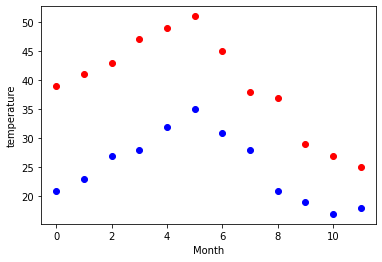

In [17]:
months = np.arange(12)
plt.plot(months, max_tem, 'ro')
plt.plot(months, min_tem, 'bo')
plt.xlabel('Month')
plt.ylabel('temperature')

In [26]:
# Fitting it to Cosine periodic function
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      max_tem, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      min_tem, [-40, 20, 0])

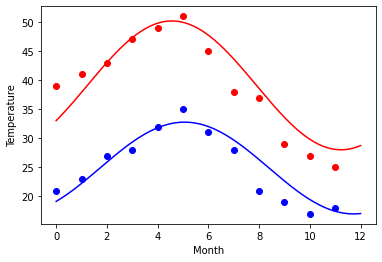

In [27]:
# Plotting the figure
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max_tem, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min_tem, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()

In [32]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic=pd.read_csv(url)    
titanic.head(5)    

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [41]:
# calculating the male,female ratio in sex column:
tot=titanic["sex"].value_counts()

In [43]:
ratio=tot/len(titanic["sex"])*100

In [44]:
ratio

male      64.351145
female    35.572519
Name: sex, dtype: float64

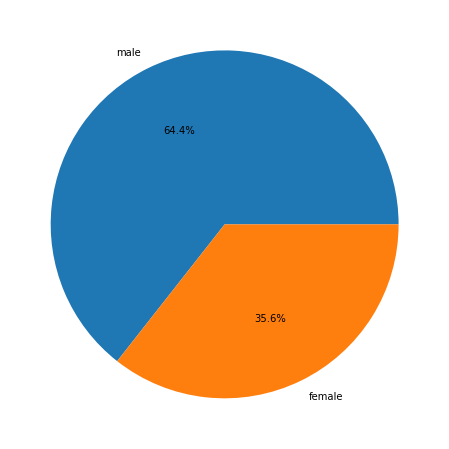

In [48]:
label=["male","female"]
fig=plt.figure(figsize=(10,8))
plt.pie(ratio,labels=label,autopct="%1.1f%%")
plt.show()

In [49]:
male=titanic[titanic.sex=="male"]
female=titanic[titanic.sex=="female"]

<AxesSubplot:xlabel='age', ylabel='fare'>

<Figure size 432x288 with 0 Axes>

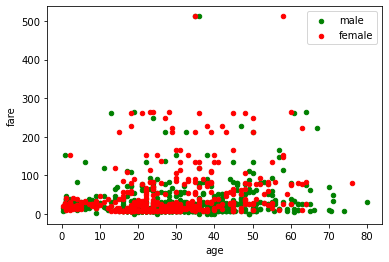

In [57]:
plt.figure()
ax1=male.plot.scatter("age","fare",color="green",label="male")
female.plot.scatter("age","fare",color="red",label="female",ax=ax1)